# CineFeel_Phase_3.Emotion_classification

# 데이터 준비

## 소스 가져오기

In [1]:
# prompt: sesac-ljj-20250715/pjt_cinefeel/src/preprocessing/doklip_minju.zip 버킷에서 이 zip파일을 다운로드 할 거야.
image_source_path = "sesac-ljj-20250715/pjt_cinefeel/src/preprocessing/doklip_minju.zip"

!gsutil cp gs://{image_source_path}.

CommandException: Wrong number of arguments for "cp" command.


In [ ]:
# prompt: 다운받아온 zip 파일을 파일명과 폴더명으로 unzip

import zipfile
import os

def unzip_file(zip_path):
  """Unzips a zip file, creating a directory with the same name if it doesn't exist."""
  try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
      # Extract to a directory with the same name as the zip file (without extension)
      extract_dir = os.path.splitext(zip_path)[0]
      if not os.path.exists(extract_dir):
        os.makedirs(extract_dir)
      zip_ref.extractall(extract_dir)
      print(f"Successfully unzipped {zip_path} to {extract_dir}")
  except zipfile.BadZipFile:
    print(f"Error: {zip_path} is not a valid zip file.")
  except Exception as e:
    print(f"An error occurred: {e}")

unzip_file("doklip_minju.zip") # Assuming the file exists after the gsutil command

Successfully unzipped doklip_minju.zip to doklip_minju


In [ ]:
# prompt: /content/doklip_minju/minju  디렉토리의 모든 이미지파일을 추출하여 dataset화

import os
from PIL import Image
import numpy as np

def create_dataset_from_images(directory):
  """Creates a dataset (list of images) from image files in a directory."""
  dataset = []
  for filename in os.listdir(directory):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Add more extensions if needed
      try:
        filepath = os.path.join(directory, filename)
        image = Image.open(filepath)
        # Convert image to numpy array if needed
        image_np = np.array(image)
        dataset.append(image_np)
        print(f"Added image: {filename}")
      except Exception as e:
        print(f"Error processing image {filename}: {e}")
  return dataset

# Example usage:
image_directory = "/content/doklip_minju/minju"
image_dataset = create_dataset_from_images(image_directory)

if image_dataset:
  print(f"Created dataset with {len(image_dataset)} images.")
  # Now you can work with the image_dataset (e.g., convert to a NumPy array if needed)
  # Example:
  # image_dataset_np = np.array(image_dataset)
else:
  print("No images found in the specified directory.")

Added image: frame24932_face0.jpg
Added image: frame41538_face0.jpg
Added image: frame9798_face0.jpg
Added image: frame10304_face0.jpg
Added image: frame15962_face0.jpg
Added image: frame7153_face0.jpg
Added image: frame8050_face0.jpg
Added image: frame16215_face0.jpg
Added image: frame3864_face0.jpg
Added image: frame20355_face0.jpg
Added image: frame6923_face0.jpg
Added image: frame1219_face0.jpg
Added image: frame8303_face0.jpg
Added image: frame9706_face0.jpg
Added image: frame9821_face0.jpg
Added image: frame7636_face0.jpg
Added image: frame16169_face0.jpg
Added image: frame3013_face0.jpg
Added image: frame7176_face0.jpg
Added image: frame8004_face0.jpg
Added image: frame10580_face0.jpg
Added image: frame24817_face0.jpg
Added image: frame41561_face0.jpg
Added image: frame15778_face0.jpg
Added image: frame24909_face0.jpg
Added image: frame10327_face0.jpg
Added image: frame6854_face0.jpg
Added image: frame24771_face0.jpg
Added image: frame9844_face0.jpg
Added image: frame15870_face0

## FER-2013 데이터셋과 동일하게 전처리

In [ ]:
# prompt: FER-2013 데이터셋과 동일하게 전처리

import numpy as np
import cv2

def preprocess_fer2013(image_dataset):
  """Preprocesses images similar to FER-2013 dataset (grayscale, resizing, normalization)."""
  preprocessed_dataset = []
  for image_np in image_dataset:
    try:
      # Convert to grayscale
      if len(image_np.shape) > 2 and image_np.shape[2] == 3:  # Check if it's a color image
        image_gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
      else:
        image_gray = image_np

      # Resize to 48x48 (FER-2013 standard size)
      image_resized = cv2.resize(image_gray, (48, 48))

      # Normalize pixel values to [0, 1] (optional but recommended)
      image_normalized = image_resized / 255.0

      preprocessed_dataset.append(image_normalized)

    except Exception as e:
      print(f"Error preprocessing image: {e}")

  return preprocessed_dataset


preprocessed_images = preprocess_fer2013(image_dataset)

if preprocessed_images:
  print(f"Preprocessed {len(preprocessed_images)} images.")
  # Now you can work with the preprocessed_images (e.g., convert to a NumPy array)
  preprocessed_images_np = np.array(preprocessed_images)
  print(preprocessed_images_np.shape) # Verify the shape (number of images, 48, 48)


else:
  print("No images to preprocess.")

Preprocessed 113 images.
(113, 48, 48)


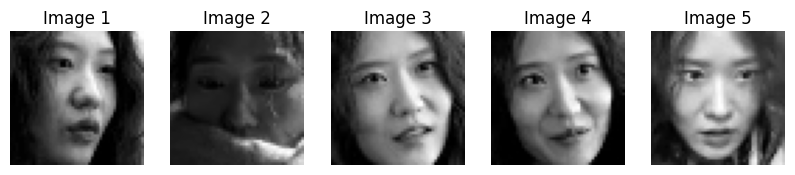

In [ ]:
# prompt: 이미지셋 확인

import matplotlib.pyplot as plt

# Check if there are any images to display
if preprocessed_images:
  # Display a few preprocessed images
  num_images_to_display = min(5, len(preprocessed_images))  # Display up to 5 images

  plt.figure(figsize=(10, 4))
  for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(preprocessed_images[i], cmap='gray')  # Use cmap='gray' for grayscale images
    plt.title(f"Image {i+1}")
    plt.axis('off')

  plt.show()
else:
  print("No images to display.")

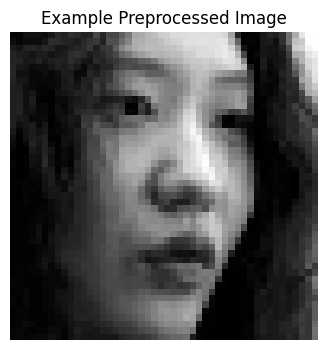

In [ ]:
# prompt: 사용된 예시 이미지도 보여줘.

import matplotlib.pyplot as plt

# Check if there are any images to display
if 'preprocessed_images_np' in locals() and len(preprocessed_images_np) > 0:
    # Display the first preprocessed image (the one used for prediction)
    single_image = preprocessed_images_np[0]

    plt.figure(figsize=(4, 4))
    plt.imshow(single_image, cmap='gray')
    plt.title("Example Preprocessed Image")
    plt.axis('off')
    plt.show()

else:
    print("No images to display.")

# 모델 준비

## Mini-Xception
- FER-2013으로 기반모델

In [ ]:
# prompt: https://storage.googleapis.com/sesac-ljj-20250715/pjt_cinefeel/model/_mini_XCEPTION.102-0.66.hdf5 로 모델 다운로드

!gsutil cp gs://sesac-ljj-20250715/pjt_cinefeel/model/_mini_XCEPTION.102-0.66.hdf5 .

Copying gs://sesac-ljj-20250715/pjt_cinefeel/model/_mini_XCEPTION.102-0.66.hdf5...
/ [1 files][852.4 KiB/852.4 KiB]                                                
Operation completed over 1 objects/852.4 KiB.                                    


In [ ]:
# prompt: weights_path 변수에 가중치 저장

weights_path = "_mini_XCEPTION.102-0.66.hdf5"

새로운 모델 아키텍처:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 48, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 48, 48, 8) │         72 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 48, 8) │         32 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 48, 48, 8) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 48, 48, 8) │        576 │ activation_20[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 48, 8) │         32 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_21       │ (None, 48, 48, 8) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_8  │ (None, 48, 48,    │        200 │ activation_21[0]… │
│ (SeparableConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 48,    │         64 │ separable_conv2d… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_22       │ (None, 48, 48,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_9  │ (None, 48, 48,    │        400 │ activation_22[0]… │
│ (SeparableConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 48,    │         64 │ separable_conv2d… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 24, 24,    │        128 │ activation_21[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 24, 24,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 24, 24,    │         64 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 24, 24,    │          0 │ max_pooling2d_5[… │
│                     │ 16)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_10 │ (None, 24, 24,    │        656 │ add_9[0][0]       │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 58,423 (228.21 KB)

 Trainable params: 56,951 (222.46 KB)

 Non-trainable params: 1,472 (5.75 KB)


모델 가중치를 '_mini_XCEPTION.102-0.66.hdf5'에서 성공적으로 불러왔습니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step

단일 이미지에 대한 예측 확률:
angry: 0.2014
disgust: 0.0016
fear: 0.2341
happy: 0.1010
sad: 0.1863
surprise: 0.0057
neutral: 0.2698


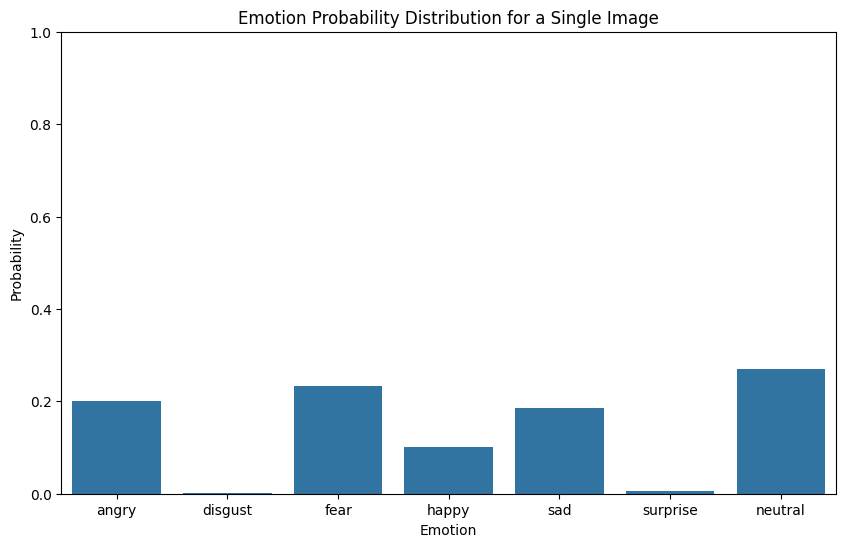

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, SeparableConv2D, MaxPooling2D, Add, GlobalAveragePooling2D, Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correct Mini-Xception model architecture to match the pre-trained weights
def mini_xception(input_shape, num_classes):
    img_input = Input(input_shape)

    # Entry flow
    x = Conv2D(8, (3, 3), strides=(1, 1), padding='same', use_bias=False)(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(8, (3, 3), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Middle flow
    # Module 1
    residual = Conv2D(16, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
    x = SeparableConv2D(16, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(16, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = Add()([x, residual])

    # Module 2
    residual = Conv2D(32, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
    x = SeparableConv2D(32, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(32, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = Add()([x, residual])

    # Module 3
    residual = Conv2D(64, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
    x = SeparableConv2D(64, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(64, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = Add()([x, residual])

    # Module 4
    residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)
    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = Add()([x, residual])

    # Exit flow
    x = Conv2D(num_classes, (3, 3), padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    output = Activation('softmax')(x)

    model = Model(img_input, output)
    return model

# 모델 생성 및 가중치 로드
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
num_classes = len(emotion_labels)
input_shape = (48, 48, 1) # (height, width, channels)

model = mini_xception(input_shape, num_classes)
print("새로운 모델 아키텍처:")
model.summary()

try:
    # 이전 셀에서 저장한 weights_path 변수를 사용합니다.
    model.load_weights(weights_path)
    print(f"\n모델 가중치를 '{weights_path}'에서 성공적으로 불러왔습니다.")

    # 전처리된 이미지 중 하나를 선택하여 예측 수행
    if 'preprocessed_images_np' in locals() and len(preprocessed_images_np) > 0:
        single_image = preprocessed_images_np[0]
        # 모델 입력 형태에 맞게 차원 확장 (48, 48) -> (1, 48, 48, 1)
        image_for_prediction = np.expand_dims(np.expand_dims(single_image, axis=0), axis=-1)

        # 예측 수행
        prediction_probabilities = model.predict(image_for_prediction)[0]

        print("\n단일 이미지에 대한 예측 확률:")
        for label, prob in zip(emotion_labels, prediction_probabilities):
            print(f"{label}: {prob:.4f}")

        # seaborn을 사용하여 막대 그래프로 시각화
        plt.figure(figsize=(10, 6))
        sns.barplot(x=emotion_labels, y=prediction_probabilities)
        plt.title('Emotion Probability Distribution for a Single Image')
        plt.xlabel('Emotion')
        plt.ylabel('Probability')
        plt.ylim(0, 1)
        plt.show()
    else:
        print("\n'preprocessed_images_np' 변수를 찾을 수 없거나 비어 있습니다.")

except Exception as e:
    print(f"\n모델 가중치를 불러오는 데 실패했습니다: {e}")
    print("가중치 파일 경로와 모델 아키텍처를 확인해주세요.")

# 모델을 이용한 이미지 분류 및 시각화

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


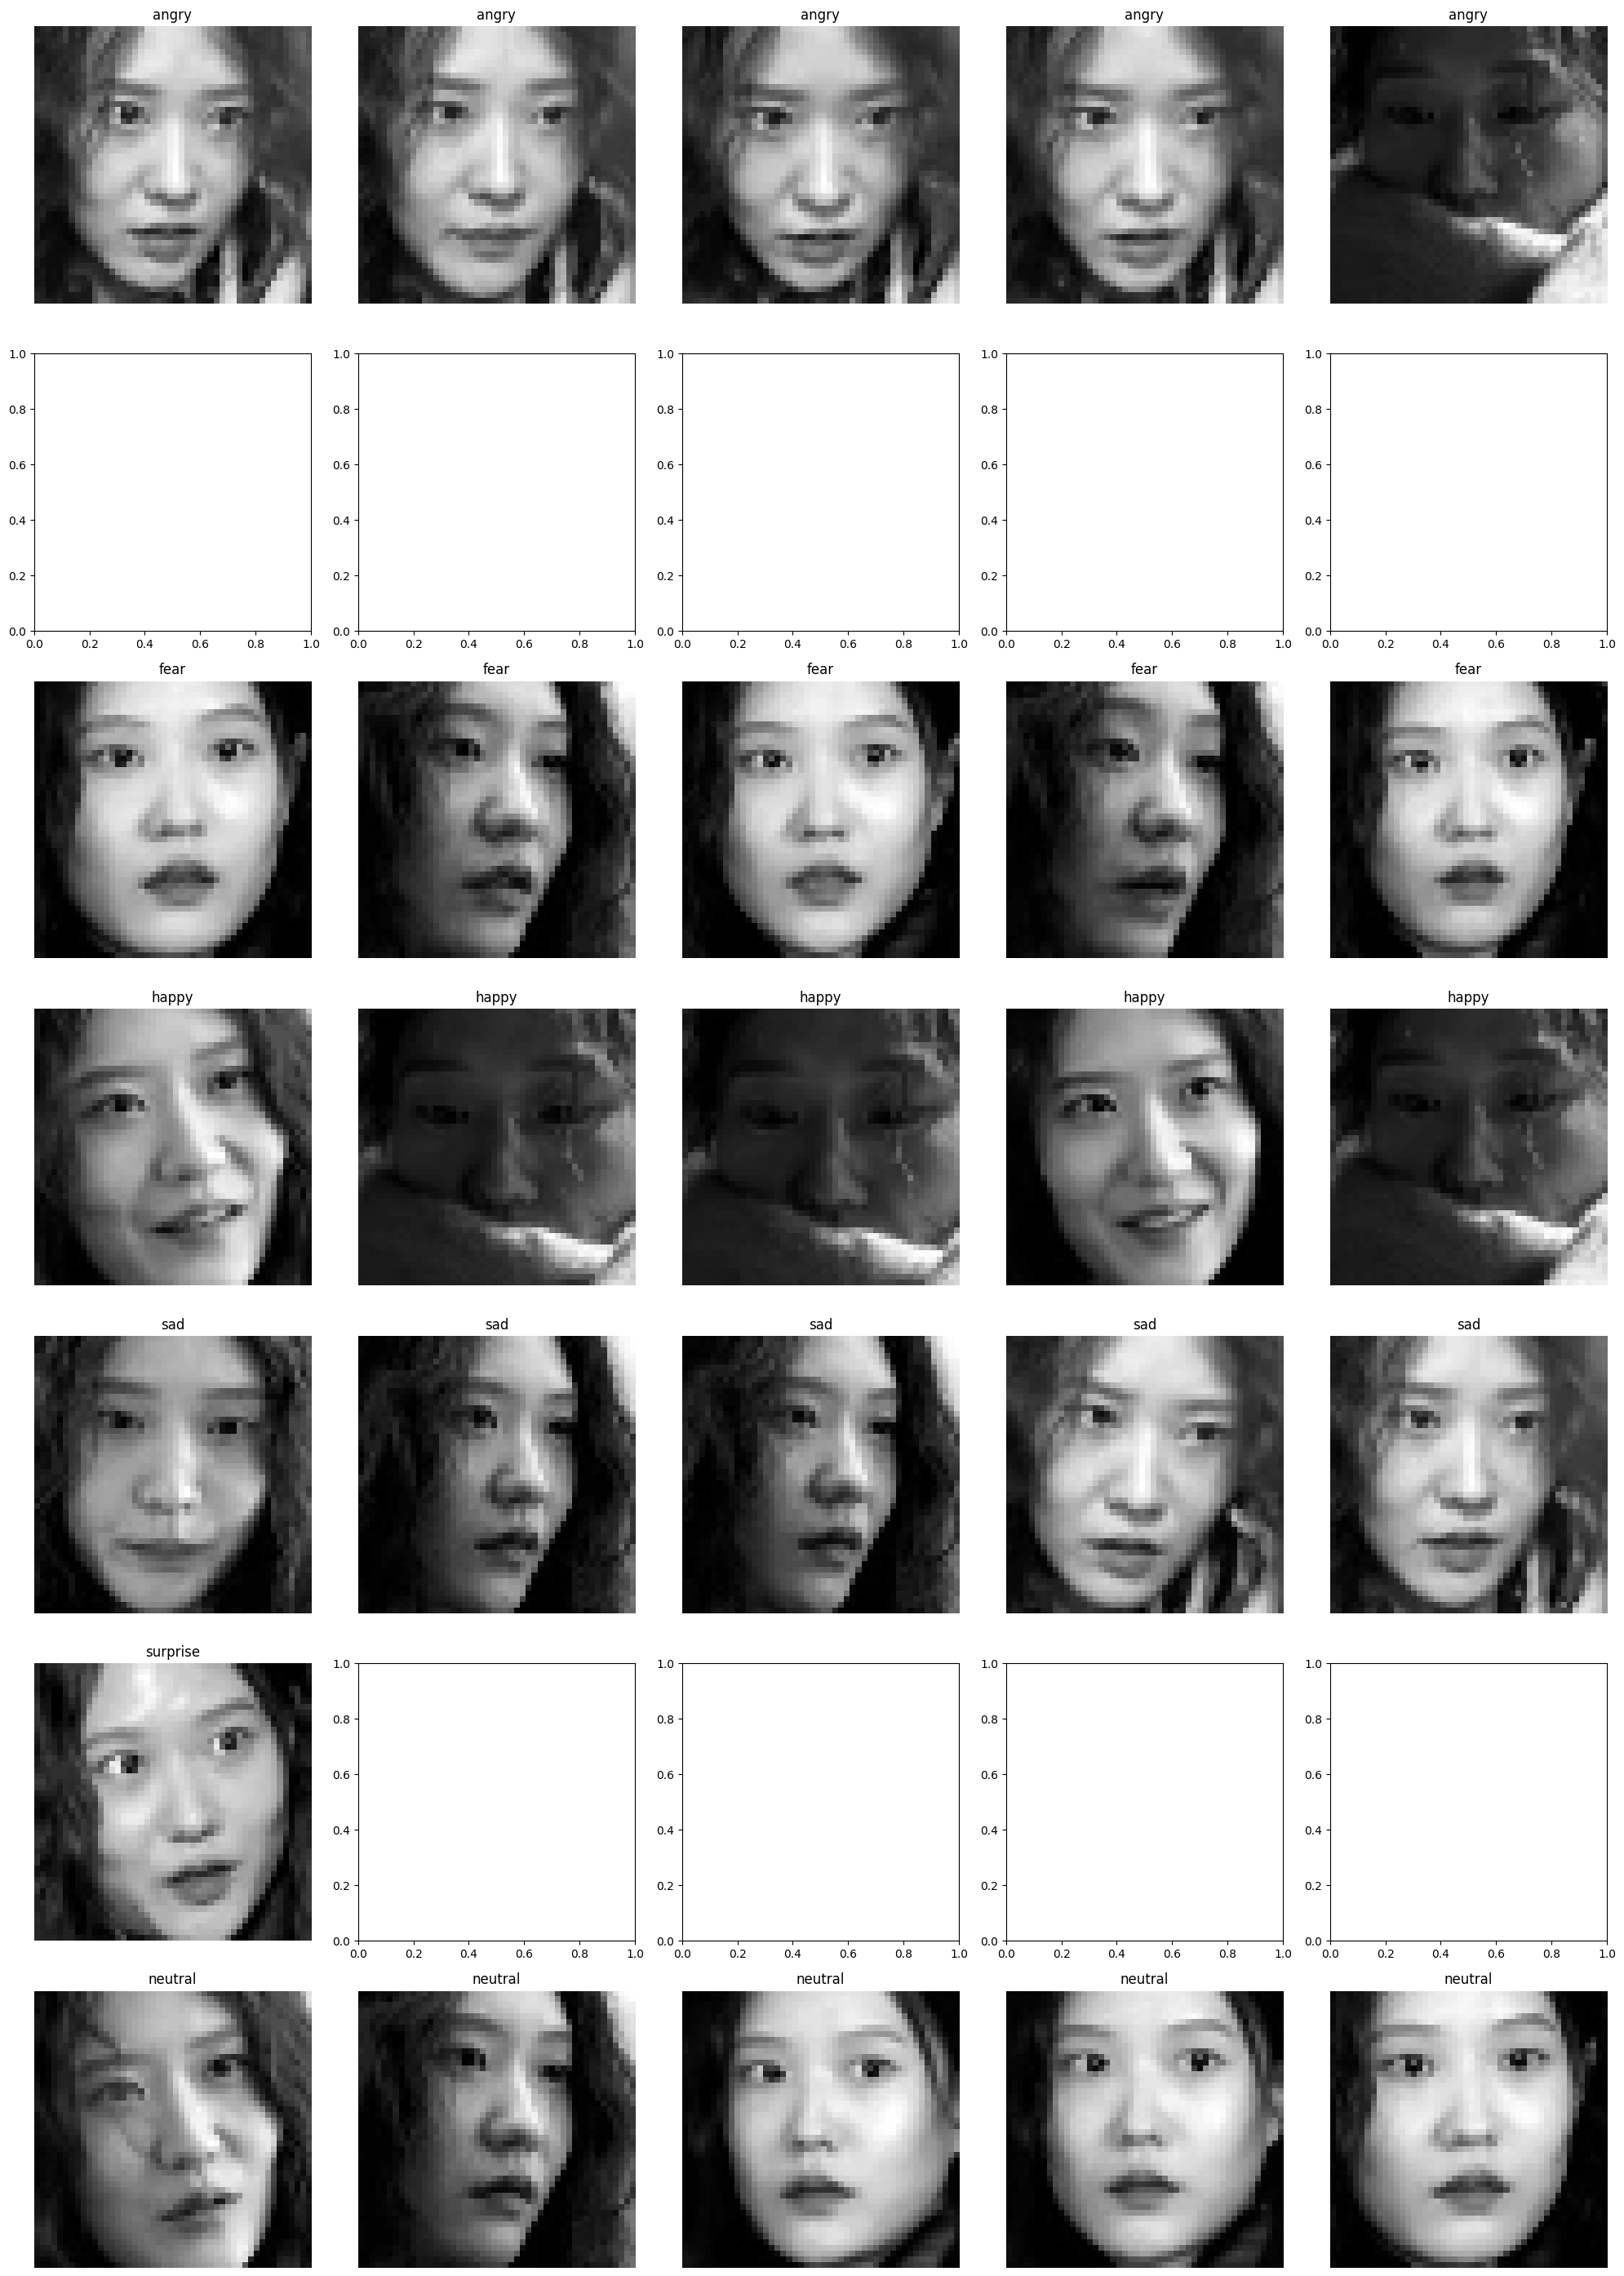

In [ ]:
# prompt: 전처리된 데이터셋을 가중치가 적용된 모델로 분류하고, 클래스별 파일들이 있다면 subplot으로 한줄에 보여줘.

import matplotlib.pyplot as plt
import numpy as np
import os

# 각 클래스별로 이미지를 저장할 디렉토리 생성
output_dir = "classified_images"
os.makedirs(output_dir, exist_ok=True)
for label in emotion_labels:
  os.makedirs(os.path.join(output_dir, label), exist_ok=True)


# preprocessed_images_np를 사용하여 예측 수행
predictions = model.predict(np.expand_dims(preprocessed_images_np, axis=-1))
predicted_labels = np.argmax(predictions, axis=1)

# 예측 결과를 이미지와 함께 출력하고 저장
num_images = len(preprocessed_images_np)
for i in range(num_images):
  predicted_label = emotion_labels[predicted_labels[i]]
  image = preprocessed_images_np[i]

  # 이미지 저장
  image_filename = os.path.join(output_dir, predicted_label, f"image_{i}.png")
  plt.imsave(image_filename, image, cmap='gray')


# 각 클래스별로 이미지를 subplot으로 출력
num_classes = len(emotion_labels)
fig, axes = plt.subplots(num_classes, 5, figsize=(20, 4 * num_classes)) # 각 클래스별로 최대 5개 이미지 출력

for i, label in enumerate(emotion_labels):
  class_dir = os.path.join(output_dir, label)
  image_files = [f for f in os.listdir(class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

  for j, image_file in enumerate(image_files[:5]): # 최대 5개 이미지 출력
    image_path = os.path.join(class_dir, image_file)
    image = plt.imread(image_path)
    axes[i, j].imshow(image, cmap='gray')
    axes[i, j].axis('off')
    axes[i, j].set_title(label)


plt.tight_layout()
plt.show()

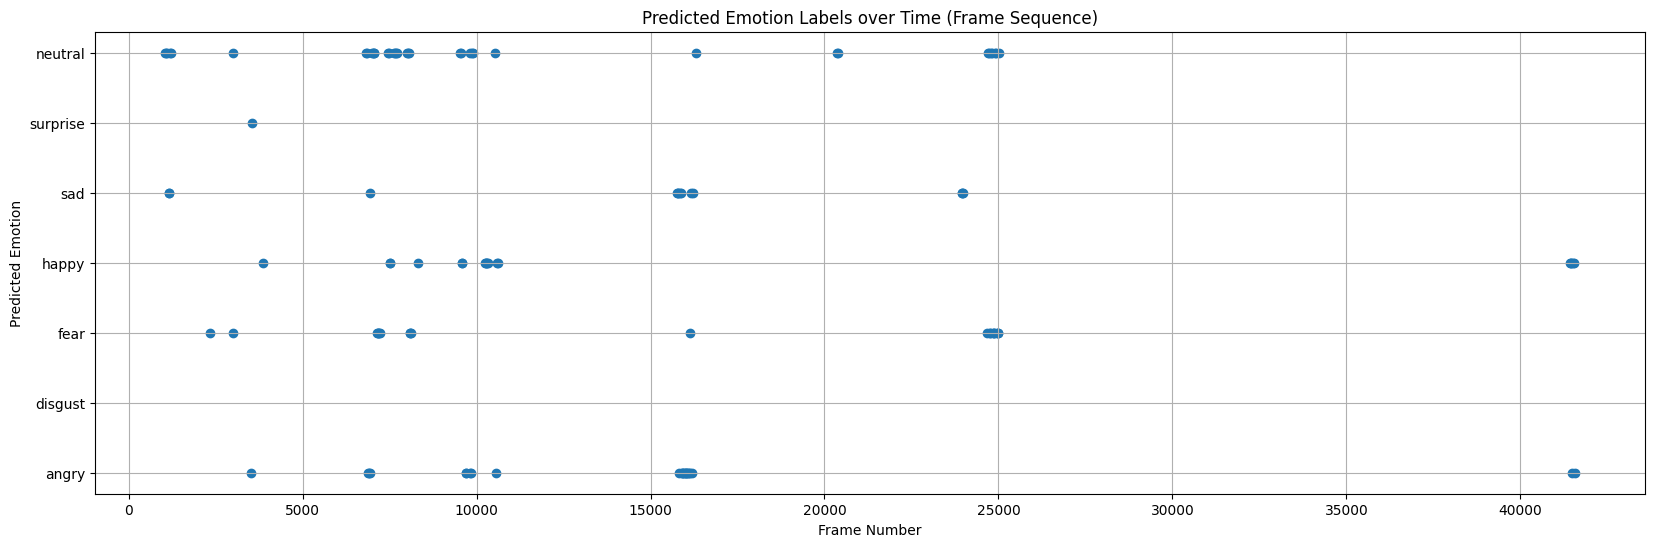

In [ ]:
# prompt:   x축은 원본파일명의 frame 순서대로 나열하고, y축은 이미지의 클래스로 시각화해줘.

import matplotlib.pyplot as plt
import numpy as np
import os
import re

# ... (previous code remains unchanged) ...

# 예측 결과를 이미지와 함께 출력하고 저장 (기존 코드와 동일)
# ...

# 이미지 파일명에서 프레임 번호 추출 및 정렬
frame_numbers = []
for filename in os.listdir(image_directory):  # 원본 이미지 디렉토리 사용
    match = re.search(r"frame(\d+)", filename)  # "frame" 다음 숫자 추출
    if match:
        frame_numbers.append(int(match.group(1)))

# 프레임 번호를 기준으로 정렬
sorted_indices = np.argsort(frame_numbers)
sorted_frame_numbers = np.array(frame_numbers)[sorted_indices]
sorted_predicted_labels = predicted_labels[sorted_indices]


# x축: 프레임 번호, y축: 예측된 감정 레이블
plt.figure(figsize=(20, 6))
plt.scatter(sorted_frame_numbers, sorted_predicted_labels, marker='o')  # Scatter plot 사용

# y축 레이블 설정 (감정 레이블)
plt.yticks(range(num_classes), emotion_labels)

plt.title('Predicted Emotion Labels over Time (Frame Sequence)')
plt.xlabel('Frame Number')
plt.ylabel('Predicted Emotion')
plt.grid(True)
plt.show()

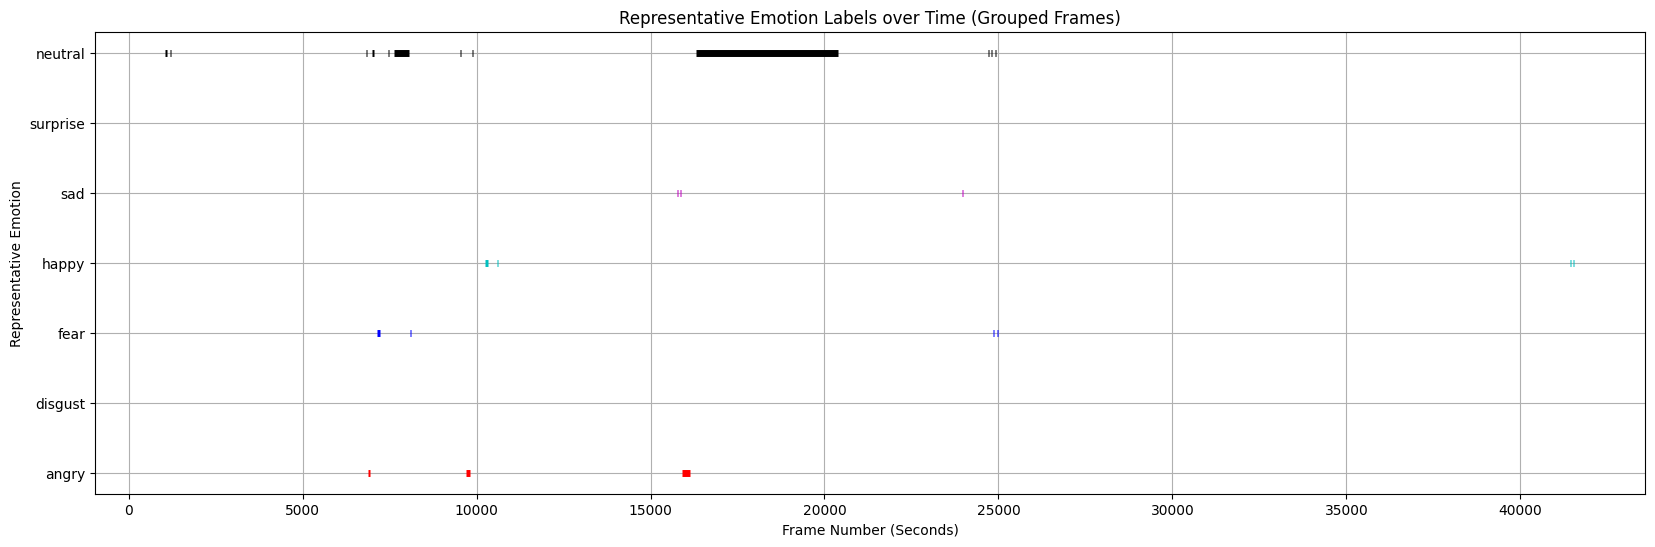

In [ ]:
# prompt: 영화는 23fps였고, 1초단위로 추출한 것 중에 얼굴이 제대로 나온 것들만 데이터셋으로 만든거야. 연속된 프레임들의 대표 감정들을 뽑아서 다시 표현해야겠어. 데이터셋을 같은 장면이라고 볼 수 있는 부분끼리 그룹화해줘.

import matplotlib.pyplot as plt
import numpy as np
import os
import re

# ... (previous code for image preprocessing, model loading, and prediction remains unchanged) ...

# ... (code for extracting and sorting frame numbers remains unchanged) ...

# Group consecutive frames with the same predicted emotion
def group_consecutive_frames(frame_numbers, predicted_labels):
  """Groups consecutive frames with the same predicted emotion label."""
  grouped_frames = []
  current_group = []
  for i in range(len(frame_numbers)):
    if not current_group or predicted_labels[i] == predicted_labels[i-1]:
      current_group.append((frame_numbers[i], predicted_labels[i]))
    else:
      grouped_frames.append(current_group)
      current_group = [(frame_numbers[i], predicted_labels[i])]
  grouped_frames.append(current_group)  # Append the last group
  return grouped_frames

grouped_frames = group_consecutive_frames(sorted_frame_numbers, sorted_predicted_labels)

# Determine representative emotion for each group (e.g., most frequent)
representative_emotions = []
for group in grouped_frames:
  labels = [frame[1] for frame in group]
  most_frequent_label = max(set(labels), key=labels.count)  # Find the most frequent label
  representative_emotions.append((group[0][0], group[-1][0], most_frequent_label)) # Store start frame, end frame, and representative label


# Plotting representative emotions over time
start_frames = [group[0] for group in representative_emotions]
end_frames = [group[1] for group in representative_emotions]
rep_labels = [group[2] for group in representative_emotions]

plt.figure(figsize=(20, 6))
# Use horizontal lines to represent the duration of each emotion
for start, end, label in representative_emotions:
  plt.hlines(label, start, end, colors=['r', 'g', 'b', 'c', 'm', 'y', 'k'][label], linewidth=5)


# y축 레이블 설정 (감정 레이블)
plt.yticks(range(num_classes), emotion_labels)

plt.title('Representative Emotion Labels over Time (Grouped Frames)')
plt.xlabel('Frame Number (Seconds)')
plt.ylabel('Representative Emotion')
plt.grid(True)
plt.show()

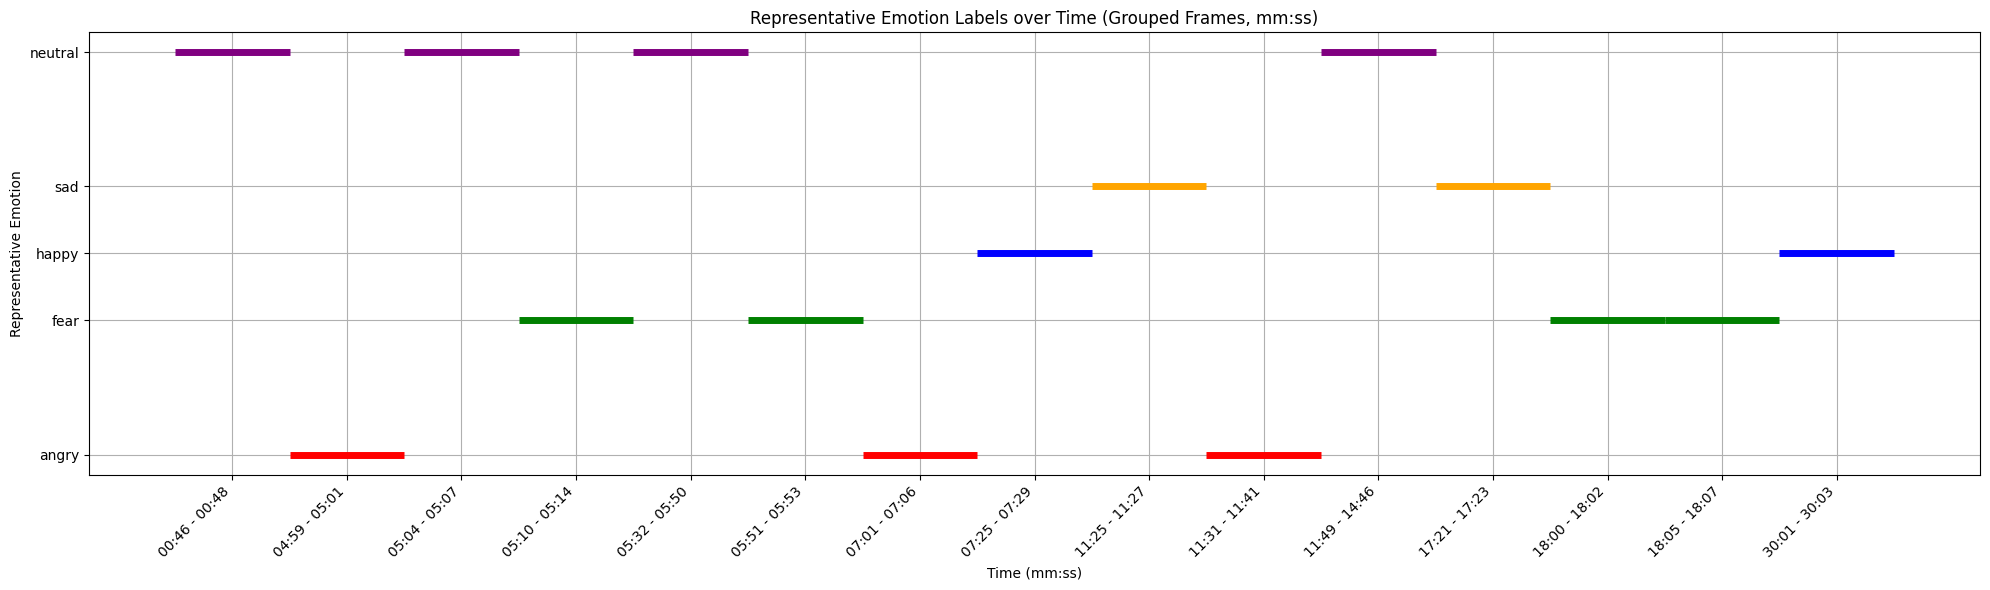

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

# ... (previous code for image preprocessing, model loading, and prediction remains unchanged) ...

# ... (code for extracting and sorting frame numbers remains unchanged) ...

# Filter out 'disgust' and 'surprise' labels and their corresponding frame numbers
valid_labels = [label for label in range(num_classes) if emotion_labels[label] not in ['disgust', 'surprise']]
filtered_indices = np.isin(sorted_predicted_labels, valid_labels)
filtered_frame_numbers = sorted_frame_numbers[filtered_indices]
filtered_predicted_labels = sorted_predicted_labels[filtered_indices]


def group_consecutive_frames(frame_numbers, predicted_labels, min_duration=3):
    """Groups consecutive frames with the same predicted emotion label if the duration is at least min_duration frames."""
    grouped_frames = []
    current_group = []
    for i in range(len(frame_numbers)):
        if not current_group or predicted_labels[i] == predicted_labels[i - 1]:
            current_group.append((frame_numbers[i], predicted_labels[i]))
        else:
            if len(current_group) >= min_duration:  # Check for minimum duration
                grouped_frames.append(current_group)
            current_group = [(frame_numbers[i], predicted_labels[i])]
    if current_group and len(current_group) >= min_duration:  # Append the last group if it meets the duration criteria
        grouped_frames.append(current_group)
    return grouped_frames

grouped_frames = group_consecutive_frames(filtered_frame_numbers, filtered_predicted_labels)

# Determine representative emotion for each group (most frequent)
representative_emotions = []
for group in grouped_frames:
    labels = [frame[1] for frame in group]
    most_frequent_label = max(set(labels), key=labels.count)
    representative_emotions.append((group[0][0], group[-1][0], most_frequent_label))

# Plotting representative emotions over time with mm:ss format and 23fps
start_frames = [group[0] for group in representative_emotions]
end_frames = [group[1] for group in representative_emotions]
rep_labels = [group[2] for group in representative_emotions]

plt.figure(figsize=(20, 6))

# Convert frame numbers to mm:ss format
def frames_to_mmss(frames, fps=23):
    # Convert the list of frames to a NumPy array for element-wise division
    times = np.array(frames) / fps
    mm = [int(t // 60) for t in times]
    ss = [int(t % 60) for t in times]
    return [f"{m:02d}:{s:02d}" for m, s in zip(mm, ss)]

start_times = frames_to_mmss(start_frames)
end_times = frames_to_mmss(end_frames)


# Use horizontal lines with adjusted x-axis ticks and labels
for i, (start, end, label) in enumerate(representative_emotions):
    # Using a simplified color mapping for safety
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
    color_index = valid_labels.index(label)
    plt.hlines(label, i, i + 1, colors=colors[color_index], linewidth=5)  # Use index for x-axis


# Set x-axis ticks and labels to be the start and end times
plt.xticks(np.arange(len(representative_emotions)) + 0.5, [f"{s} - {e}" for s, e in zip(start_times, end_times)], rotation=45, ha='right')


# Set y-axis labels (emotion labels, excluding 'disgust' and 'surprise')
plt.yticks(valid_labels, [emotion_labels[label] for label in valid_labels])

plt.title('Representative Emotion Labels over Time (Grouped Frames, mm:ss)')
plt.xlabel('Time (mm:ss)')
plt.ylabel('Representative Emotion')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()